/Users/giampieermariscal/Desktop/work/free/m_learning/entrenamiento/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
23:56:14 - cmdstanpy - INFO - Chain [1] start processing
23:56:14 - cmdstanpy - INFO - Chain [1] done processing


╒════╤═════════════════════╤═════════╤══════════════╤══════════════╕
│    │ ds                  │    yhat │   yhat_lower │   yhat_upper │
╞════╪═════════════════════╪═════════╪══════════════╪══════════════╡
│ 61 │ 2025-05-01 00:00:00 │ 772.456 │      770.343 │      774.621 │
├────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 62 │ 2025-05-02 00:00:00 │ 778.761 │      776.659 │      780.965 │
├────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 63 │ 2025-05-03 00:00:00 │ 777.514 │      775.203 │      779.693 │
├────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 64 │ 2025-05-04 00:00:00 │ 769.263 │      767.177 │      771.583 │
├────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 65 │ 2025-05-05 00:00:00 │ 779.345 │      777.204 │      781.705 │
├────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 66 │ 2025-05-06 00:00:00 │ 771.303 │      769.129 │      773.615 │
├────┼─────────────────────┼──────

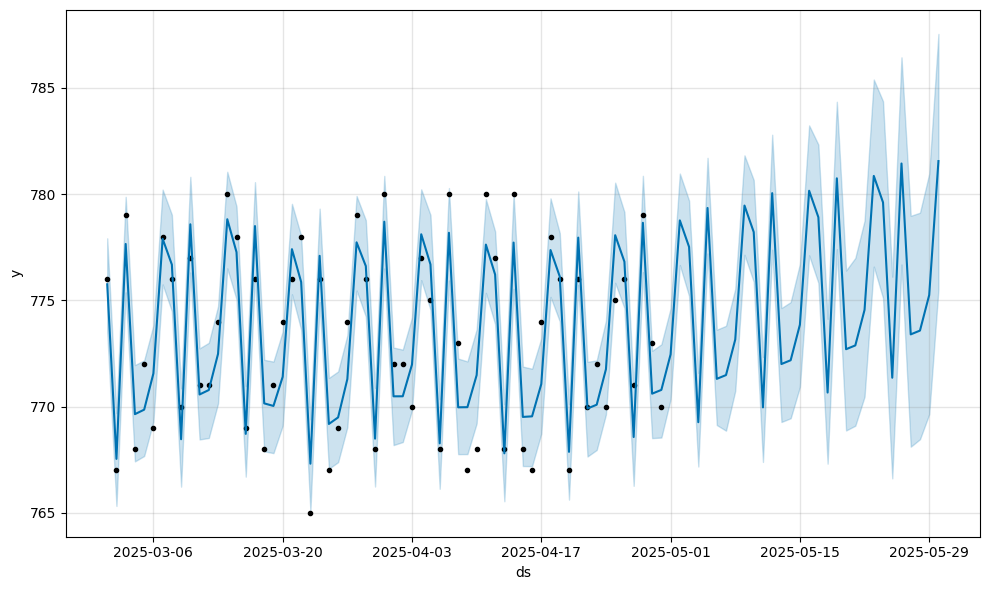

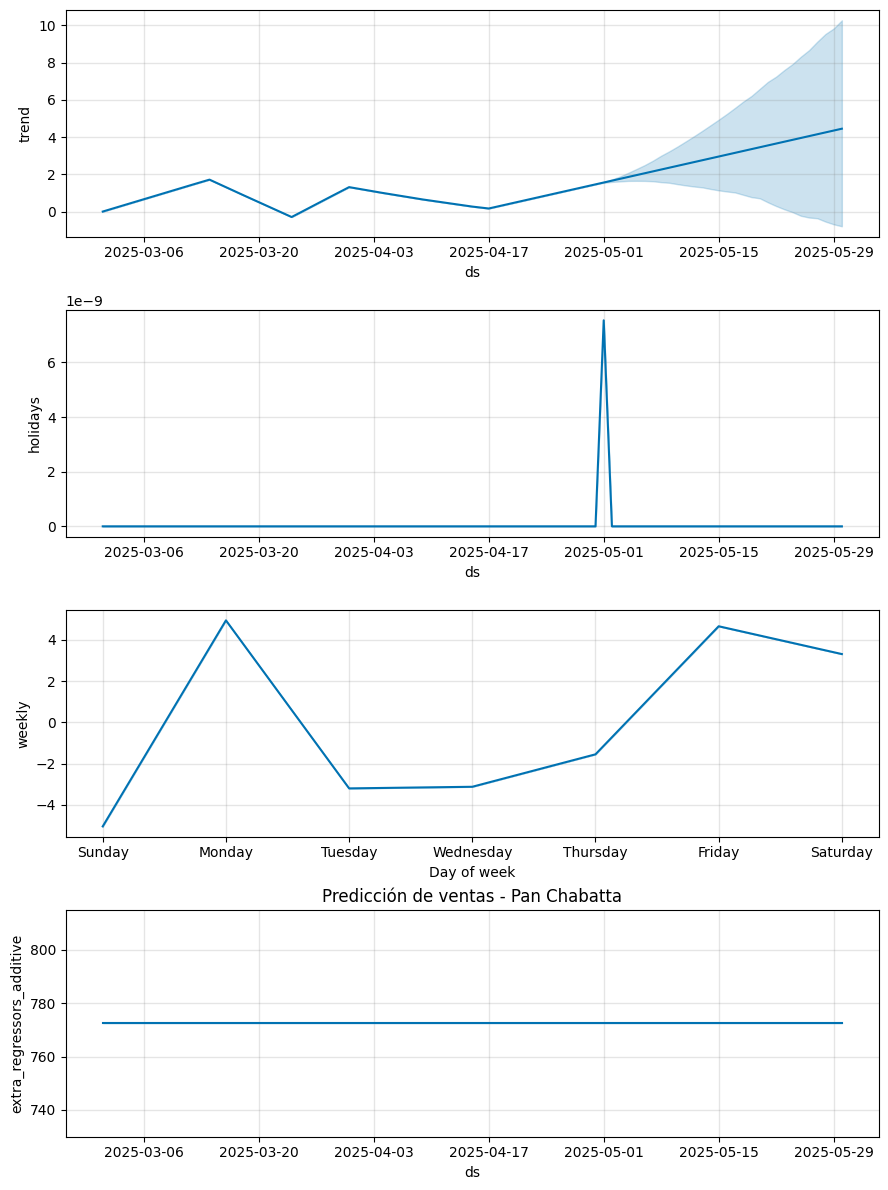

  0%|          | 0/2 [00:00<?, ?it/s]23:56:15 - cmdstanpy - INFO - Chain [1] start processing
23:56:15 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  5.39it/s]23:56:15 - cmdstanpy - INFO - Chain [1] start processing
23:56:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:00<00:00,  5.57it/s]
/Users/giampieermariscal/Desktop/work/free/m_learning/entrenamiento/.venv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/giampieermariscal/Desktop/work/free/m_learning/entrenamiento/.venv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



╒════╤═════════════════╤═══════════╤══════════╤══════════╤═════════════╤═════════════╤═════════════╤════════════╕
│    │ horizon         │       mse │     rmse │      mae │        mape │       mdape │       smape │   coverage │
╞════╪═════════════════╪═══════════╪══════════╪══════════╪═════════════╪═════════════╪═════════════╪════════════╡
│  0 │ 1 days 00:00:00 │ 14.7891   │ 3.84567  │ 3.45066  │ 0.00449446  │ 0.00449446  │ 0.00448194  │        0.5 │
├────┼─────────────────┼───────────┼──────────┼──────────┼─────────────┼─────────────┼─────────────┼────────────┤
│  1 │ 2 days 00:00:00 │ 19.292    │ 4.39227  │ 4.26331  │ 0.00553233  │ 0.00553233  │ 0.0055161   │        0   │
├────┼─────────────────┼───────────┼──────────┼──────────┼─────────────┼─────────────┼─────────────┼────────────┤
│  2 │ 3 days 00:00:00 │  0.467221 │ 0.683536 │ 0.671824 │ 0.000863117 │ 0.000863117 │ 0.000863255 │        1   │
├────┼─────────────────┼───────────┼──────────┼──────────┼─────────────┼─────────────┼──

KeyboardInterrupt: 

In [1]:
# ALL PRODUCTOS X DIAS FUTUROS
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import plotly.graph_objects as go
from tabulate import tabulate
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'browser'


# --------------------------
# Cargar el CSV local de ventas
# --------------------------
productos_csv = 'ventas_panes_marzo_x_abril_meses.csv'

# productos_csv = 'ventas_panes_marzo_x_abril_meses.csv'
csv_productos_all = pd.read_csv(productos_csv)


# --------------------------
# Cargar el CSV local de feriados del año: regressor
# --------------------------
feriados_csv = 'rango_feriados.csv'
csv_feriados_all = pd.read_csv(feriados_csv)


# Asegurar nombres de columnas consistentes
csv_productos_all.columns = csv_productos_all.columns.str.strip().str.lower()
csv_productos_all.rename(columns={
    'fecha': 'ds',
    'ventas': 'y'
}, inplace=True)

# Convertir fecha a datetime
csv_productos_all['ds'] = pd.to_datetime(csv_productos_all['ds'])
data = []
for _, feriado in csv_feriados_all.iterrows():
    data.append({  
        'holiday': feriado['description'],
        'ds': pd.to_datetime(feriado['date']),
        'lower_window': feriado['lower_window'],
        'upper_window': feriado['upper_window']
    })

# Crear DataFrame con los feriados
feriados = pd.DataFrame(data)


# --------------------------
# Modelo Prophet por producto
# --------------------------
productos = csv_productos_all['producto'].unique()
modelos = {}
predicciones = {}

for producto in productos:
    df_prod = csv_productos_all[csv_productos_all['producto'] == producto].copy()
    modelo = Prophet(holidays=feriados)
    modelo.add_regressor('precio')
    modelo.add_regressor('stock')
    modelo.fit(df_prod)

    # Fechas futuras x dias
    futuro = modelo.make_future_dataframe(periods=30)
    futuro = futuro.merge(df_prod[['ds', 'precio', 'stock']], on='ds', how='left')

    # Completar valores futuros con medias si faltan
    for col in ['precio', 'stock']:
        if futuro[col].isnull().any():
            futuro[col] = futuro[col].fillna(df_prod[col].mean())

    # Predicción
    forecast_historico = modelo.predict(futuro)
    modelos[producto] = modelo
    predicciones[producto] = forecast_historico




    # grafico x logs tabla
    # ds: Fecha.
    # yhat: Predicción esperada.
    # yhat_lower: Límite inferior (confianza).
    # yhat_upper: Límite superior (confianza).

    # Mostrar gráfico interactivo SOLO del futuro
    forecast_futuro = forecast_historico[forecast_historico['ds'] > csv_productos_all['ds'].max()]
    print(tabulate(forecast_futuro[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], headers='keys', tablefmt='fancy_grid'))



    # Gráfico dinámico con Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=forecast_futuro['ds'], y=forecast_futuro['yhat'],
                         mode='lines', name='Predicción'))
    fig.add_trace(go.Scatter(x=forecast_futuro['ds'], y=forecast_futuro['yhat_upper'],
                         mode='lines', name='Límite superior', line=dict(dash='dot')))
    fig.add_trace(go.Scatter(x=forecast_futuro['ds'], y=forecast_futuro['yhat_lower'],
                         mode='lines', name='Límite inferior', line=dict(dash='dot')))
    fig.update_layout(title='📈 Predicciones futuras (solo fechas futuras)',
                  xaxis_title='Fecha', yaxis_title='Ventas previstas',
                  template='plotly_white')
    fig.show()




    # grafico plop_components
    print(f"\n📈 Predicción para {producto}")
    modelo.plot(forecast_historico)
    modelo.plot_components(forecast_historico)
    plt.title(f'Predicción de ventas - {producto}')
    plt.show()


    #cross validation
    # Validación cruzada: cada 730 días de historico, predice los siguientes 365
    df_cv = cross_validation(modelo,
                        #  initial='7300 days',
                        #  period='730 days',
                        #  horizon='365 days'
                         initial='30 days',
                         period='15 days',
                         horizon='7 days'
                         )  
    df_p = performance_metrics(df_cv)
    
    # tabla de métricas
    print(tabulate(df_p, headers='keys', tablefmt='fancy_grid'))
    plot_cross_validation_metric(df_cv, metric='mape')
    plt.show()

23:53:04 - cmdstanpy - INFO - Chain [1] start processing
23:53:05 - cmdstanpy - INFO - Chain [1] done processing


╒══════╤═════════════════════╤═════════╤══════════════╤══════════════╕
│      │ ds                  │    yhat │   yhat_lower │   yhat_upper │
╞══════╪═════════════════════╪═════════╪══════════════╪══════════════╡
│ 9222 │ 2025-04-01 00:00:00 │ 2.83078 │     0.919646 │      4.67019 │
├──────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 9223 │ 2025-04-02 00:00:00 │ 3.41116 │     1.76349  │      5.2237  │
├──────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 9224 │ 2025-04-03 00:00:00 │ 4.56614 │     2.83749  │      6.30605 │
├──────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 9225 │ 2025-04-04 00:00:00 │ 4.0408  │     2.23882  │      5.94418 │
├──────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 9226 │ 2025-04-05 00:00:00 │ 4.56618 │     2.69656  │      6.42171 │
├──────┼─────────────────────┼─────────┼──────────────┼──────────────┤
│ 9227 │ 2025-04-06 00:00:00 │ 3.96053 │     2.15985  │      5.6369  │
├─────

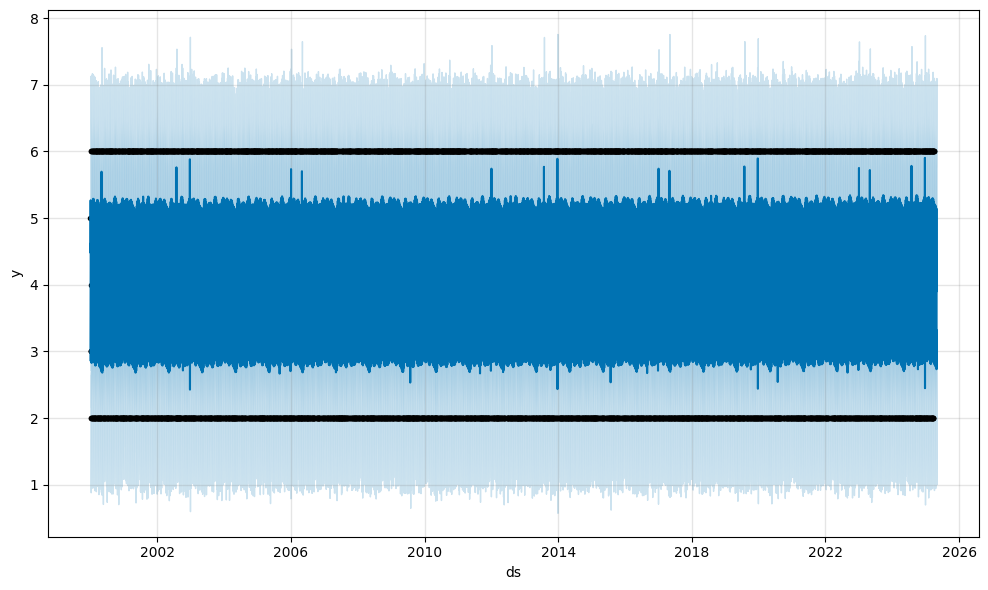

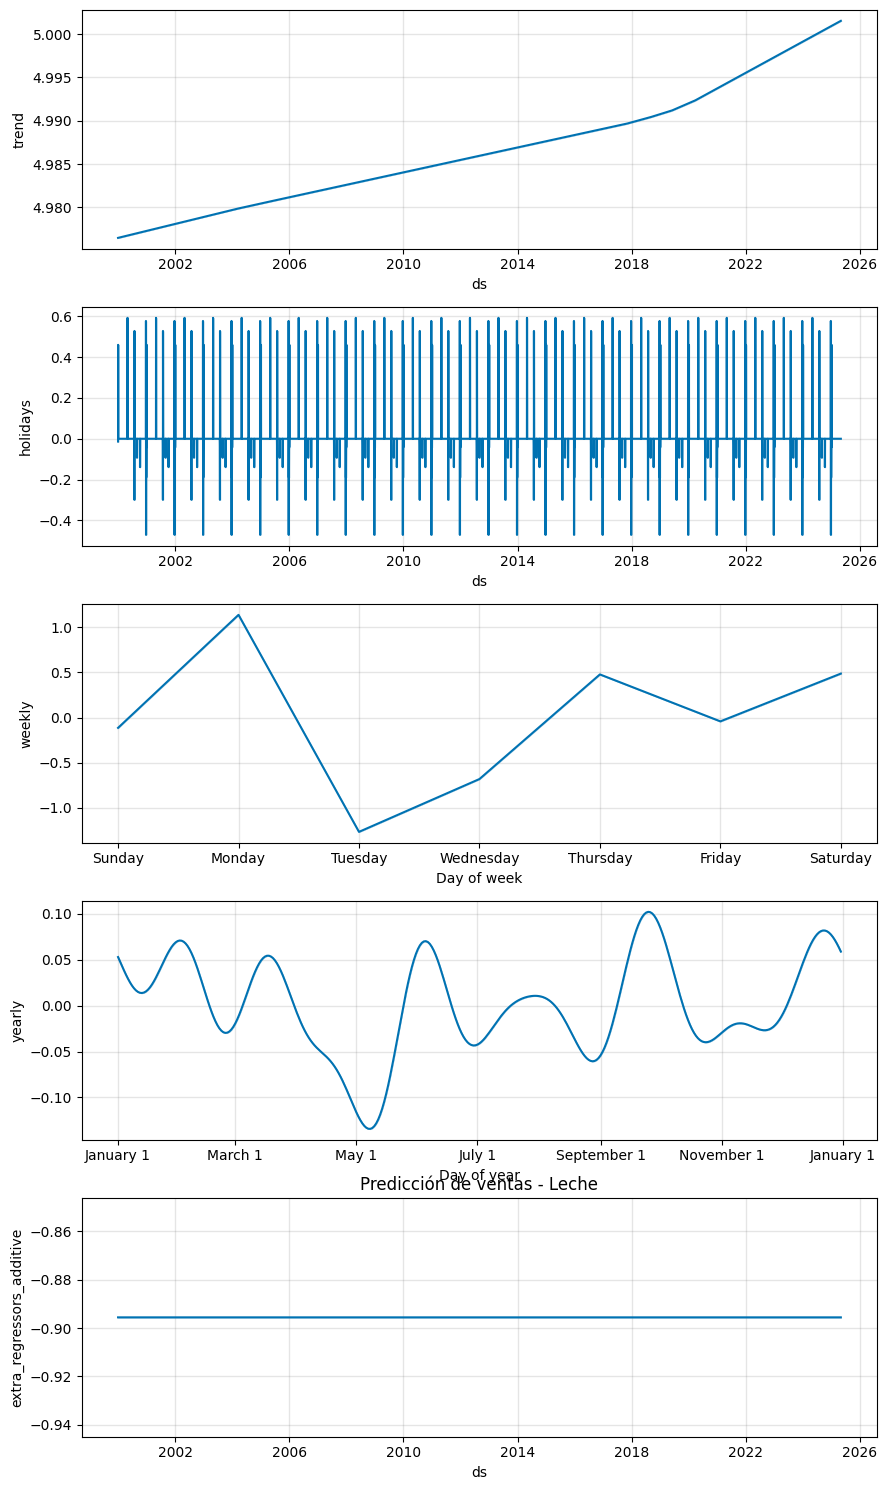

  0%|          | 0/3 [00:00<?, ?it/s]23:53:07 - cmdstanpy - INFO - Chain [1] start processing
23:53:07 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:00<00:01,  1.31it/s]23:53:08 - cmdstanpy - INFO - Chain [1] start processing
23:53:08 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:01<00:00,  1.03it/s]


KeyboardInterrupt: 

In [31]:
# FILTRO POR PRODUCTO X DIAS FUTUROS

import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import plotly.graph_objects as go
from tabulate import tabulate
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'browser'


# --------------------------
# Cargar el CSV local de ventas
# --------------------------
productos_csv = 'ventas_panes_2000_2025.csv'
csv_productos_all = pd.read_csv(productos_csv)

# filtro por producto de la lista de csv
producto_especifico = "Leche"
csv_productos_all = csv_productos_all[csv_productos_all['producto'] == producto_especifico]


# --------------------------
# Cargar el CSV local de feriados del año: regressor
# --------------------------
feriados_csv = 'rango_feriados.csv'
csv_feriados_all = pd.read_csv(feriados_csv)


# Asegurar nombres de columnas consistentes
csv_productos_all.columns = csv_productos_all.columns.str.strip().str.lower()
csv_productos_all.rename(columns={
    'fecha': 'ds',
    'ventas': 'y'
}, inplace=True)

# Convertir fecha a datetime
csv_productos_all['ds'] = pd.to_datetime(csv_productos_all['ds'])
data = []
for _, feriado in csv_feriados_all.iterrows():
    data.append({  
        'holiday': feriado['description'],
        'ds': pd.to_datetime(feriado['date']),
        'lower_window': feriado['lower_window'],
        'upper_window': feriado['upper_window']
    })

# Crear DataFrame con los feriados
feriados = pd.DataFrame(data)


# --------------------------
# Modelo Prophet por producto
# --------------------------
productos = csv_productos_all['producto'].unique()
modelos = {}
predicciones = {}

for producto in productos:
    df_prod = csv_productos_all[csv_productos_all['producto'] == producto].copy()
    modelo = Prophet(holidays=feriados)
    modelo.add_regressor('precio')
    modelo.add_regressor('stock')
    modelo.fit(df_prod)

    # Fechas futuras x dias
    futuro = modelo.make_future_dataframe(periods=30)
    futuro = futuro.merge(df_prod[['ds', 'precio', 'stock']], on='ds', how='left')

    # Completar valores futuros con medias si faltan
    for col in ['precio', 'stock']:
        if futuro[col].isnull().any():
            futuro[col] = futuro[col].fillna(df_prod[col].mean())

    # Predicción
    forecast_historico = modelo.predict(futuro)
    modelos[producto] = modelo
    predicciones[producto] = forecast_historico




    # grafico x logs tabla
    # ds: Fecha.
    # yhat: Predicción esperada.
    # yhat_lower: Límite inferior (confianza).
    # yhat_upper: Límite superior (confianza).

    # Mostrar gráfico interactivo SOLO del futuro
    forecast_futuro = forecast_historico[forecast_historico['ds'] > csv_productos_all['ds'].max()]
    print(tabulate(forecast_futuro[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], headers='keys', tablefmt='fancy_grid'))



    # Gráfico dinámico con Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=forecast_futuro['ds'], y=forecast_futuro['yhat'],
                         mode='lines', name='Predicción'))
    fig.add_trace(go.Scatter(x=forecast_futuro['ds'], y=forecast_futuro['yhat_upper'],
                         mode='lines', name='Límite superior', line=dict(dash='dot')))
    fig.add_trace(go.Scatter(x=forecast_futuro['ds'], y=forecast_futuro['yhat_lower'],
                         mode='lines', name='Límite inferior', line=dict(dash='dot')))
    fig.update_layout(title='📈 Predicciones futuras (solo fechas futuras)',
                  xaxis_title='Fecha', yaxis_title='Ventas previstas',
                  template='plotly_white')
    fig.show()




    # grafico plop_components
    print(f"\n📈 Predicción para {producto}")
    modelo.plot(forecast_historico)
    modelo.plot_components(forecast_historico)
    plt.title(f'Predicción de ventas - {producto}')
    plt.show()


    #cross validation
    # Validación cruzada: cada 730 días de historico, predice los siguientes 365
    df_cv = cross_validation(modelo,
                         initial='7300 days',
                         period='730 days',
                         horizon='7 days')  
    df_p = performance_metrics(df_cv)
    
    # tabla de métricas
    print(tabulate(df_p, headers='keys', tablefmt='fancy_grid'))
    plot_cross_validation_metric(df_cv, metric='mape')
    plt.show()


In [29]:
# CSV FERIADOS
import pandas as pd

# Rango de años
anios = range(2000, 2026)

# Feriados
feriados_config = {
    "Año Nuevo": {"fecha": "-01-01", "lower": -1, "upper": 1},
    "Día del Trabajo": {"fecha": "-05-01", "lower": 0, "upper": 0},
    "Fiestas Patrias 1": {"fecha": "-07-28", "lower": -1, "upper": 2},
    "Santa Rosa de Lima": {"fecha": "-08-30", "lower": 0, "upper": 0},
    "Batalla de Angamos": {"fecha": "-10-08", "lower": 0, "upper": 0},
    "Navidad": {"fecha": "-12-25", "lower": -2, "upper": 2}
}


# Generar registros
datos = []
for anio in anios:
    for nombre, info in feriados_config.items():
        fecha = f"{anio}{info['fecha']}"
        datos.append({
            "description": nombre,
            "date": fecha,
            "lower_window": info["lower"],
            "upper_window": info["upper"]
        })

# Crear DataFrame
df_feriados = pd.DataFrame(datos)
df_feriados['date'] = pd.to_datetime(df_feriados['date'])

# Guardar a CSV
df_feriados.to_csv("rango_feriados.csv", index=False)
print("✅ Archivo 'rango_feriados.csv' creado con éxito.")

✅ Archivo 'rango_feriados.csv' creado con éxito.


In [28]:
# CSV VENTAS PRODUCTOS X DIAS FUTUROS
import random
import datetime
import openpyxl
import csv
from openpyxl.styles import Font

try:
    from google.colab import files
    en_colab = True
except ImportError:
    en_colab = False

def generar_ventas_excel(fecha_inicio, fecha_fin, nombre_archivo_excel='ventas_panes_marzo_x_abril_meses.xlsx', nombre_archivo_csv='ventas_panes_marzo_x_abril_meses.csv'):
    # Crear libro de Excel
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.title = "Ventas Diarias"

    # Encabezados
    encabezados = ['fecha', 'producto', 'precio', 'stock',
                   'ventas']
    ws.append(encabezados)

    for col in range(1, len(encabezados) + 1):
        ws.cell(row=1, column=col).font = Font(bold=True)

    # Lista de productos
    productos = [
        'Pan Chabatta', 'Pan Francés', 'Pan Yema Largo', 'Pan Yema Redondo',
        'Pan Chapla', 'Pan Coliza', 'Pan Integral', 'Pan Caracol',
        'Pan Hamburguesa', 'Cachito', 'Pan Manjar', 'Leche',
        'Jamon', 'Café', 'Queso'
    ]

    # Precio promedio
    precios = {
        'Pan Chabatta': 0.25,
        'Pan Francés': 0.25,
        'Pan Yema Largo': 0.25,
        'Pan Yema Redondo': 0.25,
        'Pan Chapla': 0.25,
        'Pan Coliza': 0.25,
        'Pan Integral': 0.25,
        'Pan Caracol': 0.25,
        'Pan Hamburguesa': 0.4,
        'Cachito': 0.25,
        'Pan Manjar': 0.3,
        'Leche': 4.0,
        'Jamon': 2.5,
        'Café': 2.0,
        'Queso': 3.0
    }

    # Inventario fijo por producto
    inventario_fijo = {
        'Pan Chabatta': 768,
        'Pan Francés': 648,
        'Pan Yema Largo': 360,
        'Pan Yema Redondo': 360,
        'Pan Chapla': 144,
        'Pan Coliza': 192,
        'Pan Integral': 144,
        'Pan Caracol': 144,
        'Pan Hamburguesa': 288,
        'Cachito': 144,
        'Pan Manjar': 24,
        'Leche': 5,
        'Jamon': 6,
        'Café': 5,
        'Queso': 4
    }

    # Rango de ventas por producto
    rangos = {
        'Pan Chabatta': (760, 780),
        'Pan Francés': (640, 660),
        'Pan Yema Largo': (350, 380),
        'Pan Yema Redondo': (350, 380),
        'Pan Chapla': (140, 150),
        'Pan Coliza': (190, 200),
        'Pan Integral': (140, 150),
        'Pan Caracol': (140, 150),
        'Pan Hamburguesa': (280, 300),
        'Cachito': (140, 150),
        'Pan Manjar': (22, 28),
        'Leche': (2, 6),
        'Jamon': (4, 6),
        'Café': (4, 7),
        'Queso': (2, 5)
    }

    # Patrón de ventas base semanal (0=Lunes, ..., 6=Domingo)
    patrones = {
        producto: [random.randint(rangos[producto][0], rangos[producto][1]) for _ in range(7)]
        for producto in productos
    }

    # Lista para exportar también en CSV
    datos_csv = [encabezados]

    # Generar datos
    fecha_actual = fecha_inicio
    while fecha_actual <= fecha_fin:
        dia_idx = fecha_actual.weekday()  # 0 a 6

        for producto in productos:
            precio = precios[producto]
            inventario = inventario_fijo[producto]
            base_venta = patrones[producto][dia_idx]
            # Variar ventas ligeramente, sin salirse del rango definido
            venta_min, venta_max = rangos[producto]
            variacion = random.randint(-3, 3)
            ventas = min(max(base_venta + variacion, venta_min), venta_max)

            fila = [
                fecha_actual.strftime("%Y-%m-%d"),
                producto,
                precio,
                inventario,
                ventas
            ]

            ws.append(fila)
            datos_csv.append(fila)

        fecha_actual += datetime.timedelta(days=1)

    # Guardar Excel
    wb.save(nombre_archivo_excel)
    print(f"Archivo '{nombre_archivo_excel}' generado correctamente.")

    # Guardar CSV
    with open(nombre_archivo_csv, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerows(datos_csv)
    print(f"Archivo '{nombre_archivo_csv}' generado correctamente.")

    # Descargar si está en Colab
    if en_colab:
        files.download(nombre_archivo_excel)
        files.download(nombre_archivo_csv)

    return nombre_archivo_excel, nombre_archivo_csv

# Fechas de prueba
fecha_inicio = datetime.date(2025, 3, 1)
fecha_fin = datetime.date(2025, 4, 30)

# Ejecutar función
archivo_excel, archivo_csv = generar_ventas_excel(fecha_inicio, fecha_fin)

Archivo 'ventas_panes_marzo_x_abril_meses.xlsx' generado correctamente.
Archivo 'ventas_panes_marzo_x_abril_meses.csv' generado correctamente.
